### What is an API?

An API, or Application Programming Interface, is a set of rules and protocols that allows different software applications to communicate with each other. It defines how software components should interact, making it easier for developers to integrate different systems and services seamlessly.

The application programming interface must be clearly distinguished from a user interface. The user interface accepts data from users, forwards it to the application for processing, and returns the results to the user. The API does not interact with the user, but processes the data received from one program module and transmits the results back to the other module.

### How do APIs work?

The working principle of an API is commonly expressed through the request-response communication between a client and a server. The client is any front-end application that a user interacts with. The server is in charge of backend logic and database operations. In this scenario, an API works as a middle layer between the client and the server, making it possible to send data requests and responses.

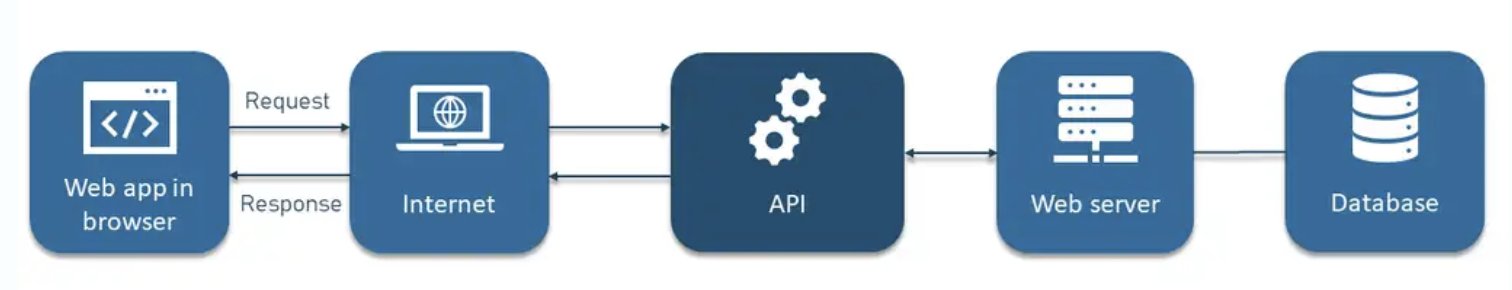

### API documentation

The API documentation is a reference manual with all the needed information about the API, including functions, classes, return types, and arguments.

No matter how many opportunities for creating or extending software products API gives, it would remain an unusable piece of code if developers didn’t understand how to work with it. Well-written and structured API documentation that explains how to effectively use and integrate an API in an easy-to-comprehend manner will make a developer happy and eager to recommend the API to peers.

The documentation usually contains

- a quick start guide;
- authentication information;
- explanations for every API call (request);
- examples of every request and return with a response description, error messages, etc.;
- samples of code for popular programmatic languages like Python, Java, JavaScript, or PHP;
tutorials

## CASE STUDY

Agro Farms, an agricultural chain in Nigeria is looking to cut overhead costs. The company has a chain of Farms across Nigeria, and currently monitor weather conditions using thier own equipments at each farm. 

The company is looking to sell-off these equipments and hire a data engineer to extract weather data of the location of all thier farms from the Internet. 

You have been hired as a data engineer to achieve this task. 


**Tasks:** Build a data pipeline to extract required weather condition for all farm locations and load the data to the Company's database on a daily basis

**OpenWeatherMap API**

The OpenWeatherMap API is a widely used web API that provides weather data and forecasts from around the world. It allows developers to access current weather conditions, forecasts, and historical weather data for any location on Earth.

To be able to access this API, sign up on the website (https://openweathermap.org) to get the api key. The OpenweatherMap API offers different packages, both paid and unpaid but we will be using the unpaid product to obtain the current weather details. Also go through the documentation (https://openweathermap.org/current) to understand how the api works and what it provides.

##### Making a Request to OpenWeatherMap API

The `requests` library in Python is a powerful tool for making HTTP requests to web servers. It simplifies the process of sending HTTP requests and processing responses, making it a popular choice for interacting with web-based APIs and services.


We begin by importing the `requests` library, which simplifies making HTTP requests to web servers.

Next, we define the URL of the OpenWeatherMap API endpoint, which includes parameters for latitude, longitude, and the API key (`appid`).

We use the `requests.get()` function to send an HTTP GET request to the specified URL.

The response from the API is stored in the `response` variable, which contains data such as weather information for the specified location.


In [ ]:
#install library
#pip install requests

In [58]:
## importint libraries
import requests 
import pandas as pd
from datetime import datetime

In [17]:
## making a request (an API call)
api_key = 'e3ada8395a9147adf25d604e9613e9ef'
lat = 5.879698
lon = 5.700531
url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}'

response = requests.get(url)

#check status
response.status_code

In [19]:
#view response
data = response.json()
data

{'coord': {'lon': 5.7005, 'lat': 5.8797},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 301.78,
  'feels_like': 307.47,
  'temp_min': 301.78,
  'temp_max': 301.78,
  'pressure': 1011,
  'humidity': 83,
  'sea_level': 1011,
  'grnd_level': 1011},
 'visibility': 10000,
 'wind': {'speed': 2.47, 'deg': 222, 'gust': 4.43},
 'rain': {'1h': 1.54},
 'clouds': {'all': 89},
 'dt': 1717256983,
 'sys': {'country': 'NG', 'sunrise': 1717219323, 'sunset': 1717264107},
 'timezone': 3600,
 'id': 2323675,
 'name': 'Sapele',
 'cod': 200}

In [41]:
## extracting relevant data
# location
location = data['name']
weather = data['weather'][0]['main']
description = data['weather'][0]['description']
temp = data['main']['temp']
pressure = data['main']['pressure']
humidity = data['main']['humidity']
w_speed = data['wind']['speed']
dt = data['dt']
tz = data['timezone']

In [43]:
df = pd.DataFrame([{'location': location,
                    'weather': weather,
                    'description': description,
                    'temp': temp,
                    'pressure': pressure,
                    'humidity': humidity,
                    'wind_speed': w_speed,
                    'dt': dt,
                    'timezone': tz}])
df

,location,weather,description,temp,pressure,humidity,wind_speed,dt,timezone
0,Sapele,Rain,moderate rain,301.78,1011,83,2.47,1717256983,3600


The `response.json()` method parses the JSON-formatted response received from the API into a Python dictionary, making it easier to access and manipulate the data.

The parsed weather data contains information such as temperature, humidity, wind speed, and atmospheric pressure for the specified location.

#### Retrieving Weather Data for Multiple Cities 

By iterating over multiple cities, we can analyze and compare weather conditions across different locations.

1. We define a list of cities for which we want to retrieve weather data.
2. Using a loop, we iterate over each city in the list and construct the API URL with the city name as a parameter.
3. We send an HTTP GET request to the OpenWeatherMap API endpoint for each city and parse the JSON response into a Python dictionary.
4. From the response, we extract relevant weather parameters such as city ID, name, temperature, weather condition, and date and timezone.

In [44]:
## get input locations
all_locations = pd.read_excel('cities.xlsx')
all_locations.head()

,city,latitude,longitude
0,Abeokuta,7.145244,3.327695
1,Port Harcourt,4.824167,7.033611
2,Maiduguri,11.833333,13.150000
3,Kano,12.000000,8.516667
4,Katsina,12.985531,7.617144


In [48]:
## Retrieve weather data for all the cities of interest

#empty lists to hold data points
locations = []
weathers = []
descriptions = []
temps = []
pressures = []
humidities = []
w_speeds = []
timezones = []
dates = []

api_key = 'e3ada8395a9147adf25d604e9613e9ef'

for index, row in all_locations.iterrows():
    lat = row['latitude']
    lon = row['longitude']

    url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}'

    response = requests.get(url)
    data = response.json()

    ## extracting relevant data
    location = data['name']
    locations.append(location)

    weather = data['weather'][0]['main']
    weathers.append(weather)

    description = data['weather'][0]['description']
    descriptions.append(description)

    temp = data['main']['temp']
    temps.append(temp)

    pressure = data['main']['pressure']
    pressures.append(pressure)

    humidity = data['main']['humidity']
    humidities.append(humidity)

    w_speed = data['wind']['speed']
    w_speeds.append(w_speed)

    dt = data['dt']
    dates.append(dt)

    tz = data['timezone']
    timezones.append(tz)


#creating my dataframe
df = pd.DataFrame({'location': locations,
                    'weather': weathers,
                    'description': descriptions,
                    'temp': temps,
                    'pressure': pressures,
                    'humidity': humidities,
                    'wind_speed': w_speeds,
                    'dt': dates,
                    'timezone': timezones})
df

,location,weather,description,temp,pressure,humidity,wind_speed,dt,timezone
0,Abeokuta,Rain,light rain,301.97,1012,79,2.82,1717260090,3600
1,Orogbum,Clouds,overcast clouds,305.25,1012,82,3.23,1717259833,3600
2,Maiduguri,Clouds,broken clouds,312.45,1005,22,8.92,1717259834,3600
3,Kano,Clouds,scattered clouds,302.09,1012,61,2.06,1717260092,3600
4,Katsina,Haze,haze,308.20,1012,41,6.69,1717260110,3600
5,Nnewi,Clouds,overcast clouds,301.00,1010,82,3.92,1717260111,3600
6,Agbor,Rain,light rain,299.89,1011,88,3.40,1717260112,3600
7,Ikeja,Clouds,scattered clouds,305.14,1012,70,3.60,1717260113,3600
8,Delta,Rain,moderate rain,299.62,1012,92,2.44,1717260114,3600
9,Akure,Rain,light rain,300.59,1011,76,2.62,1717260116,3600


In [49]:
df2 = df.copy() 

In [62]:
df2

,location,weather,description,temp,pressure,humidity,wind_speed,dt,timezone,reading_date
0,Abeokuta,Rain,light rain,28.82,1012,79,2.82,1717260090,3600,2024-06-01 18:41:30
1,Orogbum,Clouds,overcast clouds,32.10,1012,82,3.23,1717259833,3600,2024-06-01 18:37:13
2,Maiduguri,Clouds,broken clouds,39.30,1005,22,8.92,1717259834,3600,2024-06-01 18:37:14
3,Kano,Clouds,scattered clouds,28.94,1012,61,2.06,1717260092,3600,2024-06-01 18:41:32
4,Katsina,Haze,haze,35.05,1012,41,6.69,1717260110,3600,2024-06-01 18:41:50
5,Nnewi,Clouds,overcast clouds,27.85,1010,82,3.92,1717260111,3600,2024-06-01 18:41:51
6,Agbor,Rain,light rain,26.74,1011,88,3.40,1717260112,3600,2024-06-01 18:41:52
7,Ikeja,Clouds,scattered clouds,31.99,1012,70,3.60,1717260113,3600,2024-06-01 18:41:53
8,Delta,Rain,moderate rain,26.47,1012,92,2.44,1717260114,3600,2024-06-01 18:41:54
9,Akure,Rain,light rain,27.44,1011,76,2.62,1717260116,3600,2024-06-01 18:41:56


## Transformations

In [65]:
def temp_conv(x):
    new_temp = x - 273.15
    return new_temp

In [66]:
temp_conv(200)

-73.14999999999998

In [56]:
## convert the temperature readings to celcius
df2['temp'] = df2['temp'].apply(lambda x: x - 273.15)

In [141]:
# convert the date to a readable format

In [59]:
## defining function to convert time
def adjust_date(row):
    unix_datetime = row['dt'] + row['timezone'] 

    #conversion
    actual_datetime = datetime.fromtimestamp(unix_datetime)

    return actual_datetime


In [61]:
df2['reading_date'] = df2.apply(adjust_date, axis=1)

In [63]:
## drop the date and timezone columns
df2.drop(['timezone', 'dt'], axis=1, inplace=True)

In [64]:
df2

,location,weather,description,temp,pressure,humidity,wind_speed,reading_date
0,Abeokuta,Rain,light rain,28.82,1012,79,2.82,2024-06-01 18:41:30
1,Orogbum,Clouds,overcast clouds,32.10,1012,82,3.23,2024-06-01 18:37:13
2,Maiduguri,Clouds,broken clouds,39.30,1005,22,8.92,2024-06-01 18:37:14
3,Kano,Clouds,scattered clouds,28.94,1012,61,2.06,2024-06-01 18:41:32
4,Katsina,Haze,haze,35.05,1012,41,6.69,2024-06-01 18:41:50
5,Nnewi,Clouds,overcast clouds,27.85,1010,82,3.92,2024-06-01 18:41:51
6,Agbor,Rain,light rain,26.74,1011,88,3.40,2024-06-01 18:41:52
7,Ikeja,Clouds,scattered clouds,31.99,1012,70,3.60,2024-06-01 18:41:53
8,Delta,Rain,moderate rain,26.47,1012,92,2.44,2024-06-01 18:41:54
9,Akure,Rain,light rain,27.44,1011,76,2.62,2024-06-01 18:41:56


### Loading To database

In [ ]:
#!pip install python-dotenv

In [73]:
# load to snowflake DB table
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

load_dotenv(override=True)

True

In [74]:
engine = create_engine(
    'snowflake://{user}:{password}@{account_identifier}/{database}/{schema}?warehouse_name={warehouse}'.format(
        user = os.getenv('sn_user'),
        password = os.getenv('sn_pass'),
        account_identifier = os.getenv('account_identifier'),
        database = os.getenv('database'),
        schema = os.getenv('schema'),
        warehouse = os.getenv('warehouse')
    )
)


In [75]:
df2.to_sql('weather', con=engine, index=False, if_exists='append')

46

## Case Study 2

The management of AgroFarms is impressed by the efficiency of the new process of collecting weather readings. They have asked that you develop a similar process to collect exchange rates in all their currencies of interes and load this data daily to their postgres database. 